In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [4]:
from sklearn.ensemble import RandomForestClassifier as rndf

In [5]:
# n_estimators = numero de arvores da random-forest
modelo=rndf(n_estimators=100,n_jobs=-1,random_state=0)


In [6]:
# Função atribuir feminino como 1 e masculino como 0
# Deixar o sexo como uma variável binária
def trans(valor):
    if valor =='female':
        return 1
    else:
        return 0

In [7]:
# Crindo uma coluna nos dados treino
# coluna = 'Sex_binario', atribuindo sexo como 0 ou 1 nessa coluna
train['Sex_binario']=train['Sex'].map(trans)

In [8]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [9]:
#Variáveis que serão utilizadas para o modelo
variaveis = ['Sex_binario', 'Age']

In [10]:
# x = variaveis utilizadas para o modelo
# y = variaveis a prever 
x=train[variaveis]
y=train['Survived']

In [11]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [12]:
x.head()

,Sex_binario,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [13]:
#Substituindo os dados faltantes por -1
x=x.fillna(-1)

In [14]:
# Variavel de entrada = x
# Variavel a prever = y
modelo.fit(x,y)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [15]:
# Criando a coluna 'Sex_binario' nos dados de teste
# utilizando a função trans para colocar o sexo como binário 
test['Sex_binario']=test['Sex'].map(trans)

In [16]:

x_prev=test[variaveis]
x_prev

,Sex_binario,Age
0,0,34.5
1,1,47.0
2,0,62.0
3,0,27.0
4,1,22.0
...,...,...
413,0,NaN
414,1,39.0
415,0,38.5
416,0,NaN


In [17]:
x_prev=x_prev.fillna(-1)

In [18]:
#Dados de previsão
p=modelo.predict(x_prev)

In [19]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [20]:
#Criando uma serie de dados com as previsões, associando a col 'PassengerId', para efeito de comparação
# Col com os dados previstos = 'p', foi nomeada como 'Survived'
sub=pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape

(418,)

In [21]:
# Transformando o modelo em um arquivo .csv
sub.to_csv('primeiro_modelo.csv', header=True)

In [22]:
sub.head(3)

PassengerId
892    0
893    1
894    0
Name: Survived, dtype: int64

# VALIDAÇÃO DO MODELO: 

In [23]:
from sklearn.model_selection import train_test_split as tts

In [24]:
#?tts

In [25]:
x_fake= np.arange(10)

In [26]:
# Cria, de forma aleatória, um conjunto de dados pra treino e pra teste
# Se não declarar, a divisão é feita 70-30%
# test_size= definiu 50% do conjunto pra treino e teste
# x_treino e x_valid = dados de entrada
# y_treino e y_valid =  dados de previsão
# equivalem a x, y respectivamente, já declaradas anteriormente 
np.random.seed(0)
x_treino,  x_valid, y_treino, y_valid = tts(x, y, test_size=0.5)

In [27]:
x_treino.shape, x_valid.shape, y_treino.shape, y_valid.shape

((445, 2), (446, 2), (445,), (446,))

In [28]:
modelo=rndf(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(x_treino, y_treino)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [29]:
p=modelo.predict(x_valid)

In [30]:
#Acurácia
np.mean(y_valid==p)

0.7690582959641256

# VALIDAÇÃO CRUZARA


In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

In [32]:
# ?KFold

In [33]:
resultados=[]
for rep in range(10): 
    #print ('Rep: ',rep)
    kf=RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

    for l_treino, l_valid in kf.split(x):
        #print('Treino:', l_treino.shape[0])
        #print('Validação:', l_valid.shape[0])

        x_treino, x_valid =x.iloc[l_treino], x.iloc[l_valid]
        y_treino, y_valid = y.iloc[l_treino], y.iloc[l_valid]
        #print(x_treino.head())

        modelo=rndf(n_estimators=100, n_jobs=-1, random_state=0)
        modelo.fit(x_treino, y_treino)

        p=modelo.predict(x_valid)

        acc=np.mean(y_valid==p)
        resultados.append(acc)
        #print('Acc: ', acc)
        #print()

print('Média: ')
print(np.mean(resultados))

Média: 
0.759601451100922


In [35]:
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


(array([20., 10., 30., 60., 40., 20., 10.,  0.,  0., 10.]),
 array([0.73542601, 0.74165869, 0.74789137, 0.75412405, 0.76035673,
        0.76658941, 0.77282209, 0.77905477, 0.78528745, 0.79152013,
        0.79775281]),
 <BarContainer object of 10 artists>)

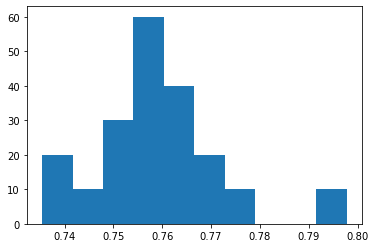

In [36]:
pylab.hist(resultados)

# NOVAS VARIAVEIS

In [37]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [38]:
variaveis2=['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [39]:
Z=train[variaveis2].fillna(-1)
J=train['Survived']

In [40]:
np.random.seed(1)
x_treino,  x_valid, y_treino, y_valid = tts(Z, J, test_size=0.5)

In [41]:
# ?RepeatedKFold

In [42]:
resultados=[]
for rep in range(10): 
    #print ('Rep: ',rep)
    kf=RepeatedKFold(n_splits=2, n_repeats=5, random_state=10)

    for l_treino, l_valid in kf.split(Z):
        #print('Treino:', l_treino.shape[0])
        #print('Validação:', l_valid.shape[0])

        x_treino, x_valid =Z.iloc[l_treino], Z.iloc[l_valid]
        y_treino, y_valid = J.iloc[l_treino], J.iloc[l_valid]
        #print(x_treino.head())

        modelo=rndf(n_estimators=100, n_jobs=-1, random_state=0)
        modelo.fit(x_treino, y_treino)

        p=modelo.predict(x_valid)

        acc=np.mean(y_valid==p)
        resultados.append(acc)
        #print('Acc: ', acc)
        #print()

print('------------------------------')
print('Média: ')
print(np.mean(resultados))

------------------------------
Média: 
0.7981987202096035


(array([30., 20.,  0.,  0., 20.,  0.,  0., 10., 10., 10.]),
 array([0.77977528, 0.78453318, 0.78929108, 0.79404897, 0.79880687,
        0.80356477, 0.80832267, 0.81308057, 0.81783846, 0.82259636,
        0.82735426]),
 <BarContainer object of 10 artists>)

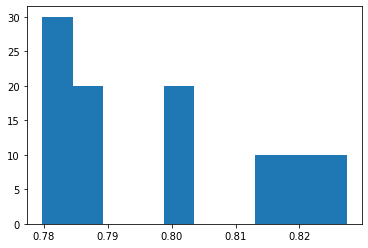

In [43]:
pylab.hist(resultados)

In [44]:
modelo=rndf(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(Z, J)

p=modelo.predict(test[variaveis2].fillna(-1))

Criando nova submission 

In [45]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape

(418,)

In [46]:
sub.to_csv('Modelo2.csv', header=True)

# Será que o porto tem algo com a sobrevivência?


In [47]:
import seaborn as sns

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

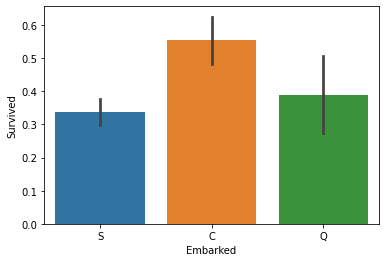

In [48]:
sns.barplot(x=train.Embarked, y=train.Survived, data=train)

In [49]:
porto_sobrevivencia=['Embarked', 'Survived']

In [50]:
def porto1 (valor):
    if valor =='C':
        return 1
    else:
        return 0

In [51]:
def porto2 (valor):
    if valor =='S':
        return 1
    else:
        return 0

In [52]:
train['Porto1']=train['Embarked'].map(porto1)

In [53]:
train['Porto2']=train['Embarked'].map(porto2)

In [54]:
variaveis3=['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Porto1', 'Porto2']

In [55]:
I=train[variaveis3].fillna(-1)
L=train['Survived']

In [56]:
np.random.seed(1)
x_treino,  x_valid, y_treino, y_valid = tts(I, L, test_size=0.5)

In [57]:
resultados=[]
for rep in range(10): 
    #print ('Rep: ',rep)
    kf=RepeatedKFold(n_splits=2, n_repeats=5, random_state=10)

    for l_treino, l_valid in kf.split(I):
        
        x_treino, x_valid =I.iloc[l_treino], I.iloc[l_valid]
        y_treino, y_valid = L.iloc[l_treino], L.iloc[l_valid]
        #print(x_treino.head())

        modelo=rndf(n_estimators=100, n_jobs=-1, random_state=0)
        modelo.fit(x_treino, y_treino)

        p=modelo.predict(x_valid)

        acc=np.mean(y_valid==p)
        resultados.append(acc)
        #print('Acc: ', acc)
        #print()

print('------------------------------')
print('Média: ')
print(np.mean(resultados))

------------------------------
Média: 
0.7919131354864715


# E os nomes?

In [58]:
Nomes = []
for i in range(0,len(train.Name)):
    Nomes.append(train.Name[i].split(',')[:1][0])

In [59]:
train['Nomes']=Nomes

In [61]:
train['Familias']=train.groupby(train['Nomes'])['Nomes'].transform('count')


In [ ]:
'''Titulo= []
for i in range(0,len(train.Name)):
    #itulo.append
    Titulo.append(train.Name[i].split()[1:2][0])'''

In [76]:
train.head(60)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,Porto1,Porto2,Nomes,Familias
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,Braund,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,Cumings,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1,Heikkinen,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1,Futrelle,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,Allen,2
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0,0,Moran,3
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,1,McCarthy,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0,1,Palsson,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,0,1,Johnson,6
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,1,0,Nasser,2


In [77]:
variaveis4=['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Fare', 'Familias']

In [78]:
x=train[variaveis4].fillna(-1)
y=train['Survived']

In [79]:
np.random.seed(1)
x_treino,  x_valid, y_treino, y_valid = tts(x, y, test_size=0.5)

In [80]:
resultados=[]
for rep in range(10): 
    #print ('Rep: ',rep)
    kf=RepeatedKFold(n_splits=2, n_repeats=5, random_state=10)

    for l_treino, l_valid in kf.split(x):
        
        x_treino, x_valid =x.iloc[l_treino], x.iloc[l_valid]
        y_treino, y_valid = y.iloc[l_treino], y.iloc[l_valid]
        #print(x_treino.head())

        modelo=rndf(n_estimators=100, n_jobs=-1, random_state=0)
        modelo.fit(x_treino, y_treino)

        p=modelo.predict(x_valid)

        acc=np.mean(y_valid==p)
        resultados.append(acc)
        #print('Acc: ', acc)
        #print()

print('------------------------------')
print('Média: ')
print(np.mean(resultados))

------------------------------
Média: 
0.7919106162140375


In [96]:
#train["CabinL"] = train["Cabin"].str[0].replace(np.nan,"N/A").replace('T',"N/A")

In [102]:
#train["Side"] = train["Cabin"].str.split(" ").str[0].str[1:].replace("", '1').replace(np.nan, '1').astype(float) % 2

# Testando uma decision tree

In [86]:
from sklearn.tree import DecisionTreeClassifier as tree

In [93]:
resultados=[]
for rep in range(10): 
    #print ('Rep: ',rep)
    kf=RepeatedKFold(n_splits=2, n_repeats=5, random_state=10)

    for l_treino, l_valid in kf.split(x):
        
        x_treino, x_valid =x.iloc[l_treino], x.iloc[l_valid]
        y_treino, y_valid = y.iloc[l_treino], y.iloc[l_valid]
        #print(x_treino.head())

        modelo=tree(splitter='best', min_samples_split=2, random_state=0)
        modelo.fit(x_treino, y_treino)

        p=modelo.predict(x_valid)

        acc=np.mean(y_valid==p)
        resultados.append(acc)
        #print('Acc: ', acc)
        #print()

print('------------------------------')
print('Média: ')
print(np.mean(resultados))

------------------------------
Média: 
0.7521932785811457
